In [176]:
import pandas as pd
import numpy as np
import missingno
import math
import matplotlib.pyplot as plt
from datetime import datetime
from feature_engine.imputation import CategoricalImputer

In [3]:
xls = pd.ExcelFile('KPMG_VI_New_raw_data_update_final.xlsx')
df_Transactions = pd.read_excel(xls, 'Transactions',skiprows=1)
df_NewCustomerList = pd.read_excel(xls, 'NewCustomerList', skiprows=1)

df_CustomerAddress = pd.read_excel(xls, 'CustomerAddress')

#### Transactions

In [12]:
df_Transactions.shape

(20000, 13)

In [13]:
df_Transactions.isnull().sum()/df_Transactions.shape[0]*100

transaction_id             0.000
product_id                 0.000
customer_id                0.000
transaction_date           0.000
online_order               1.800
order_status               0.000
brand                      0.985
product_line               0.985
product_class              0.985
product_size               0.985
list_price                 0.000
standard_cost              0.985
product_first_sold_date    0.985
dtype: float64

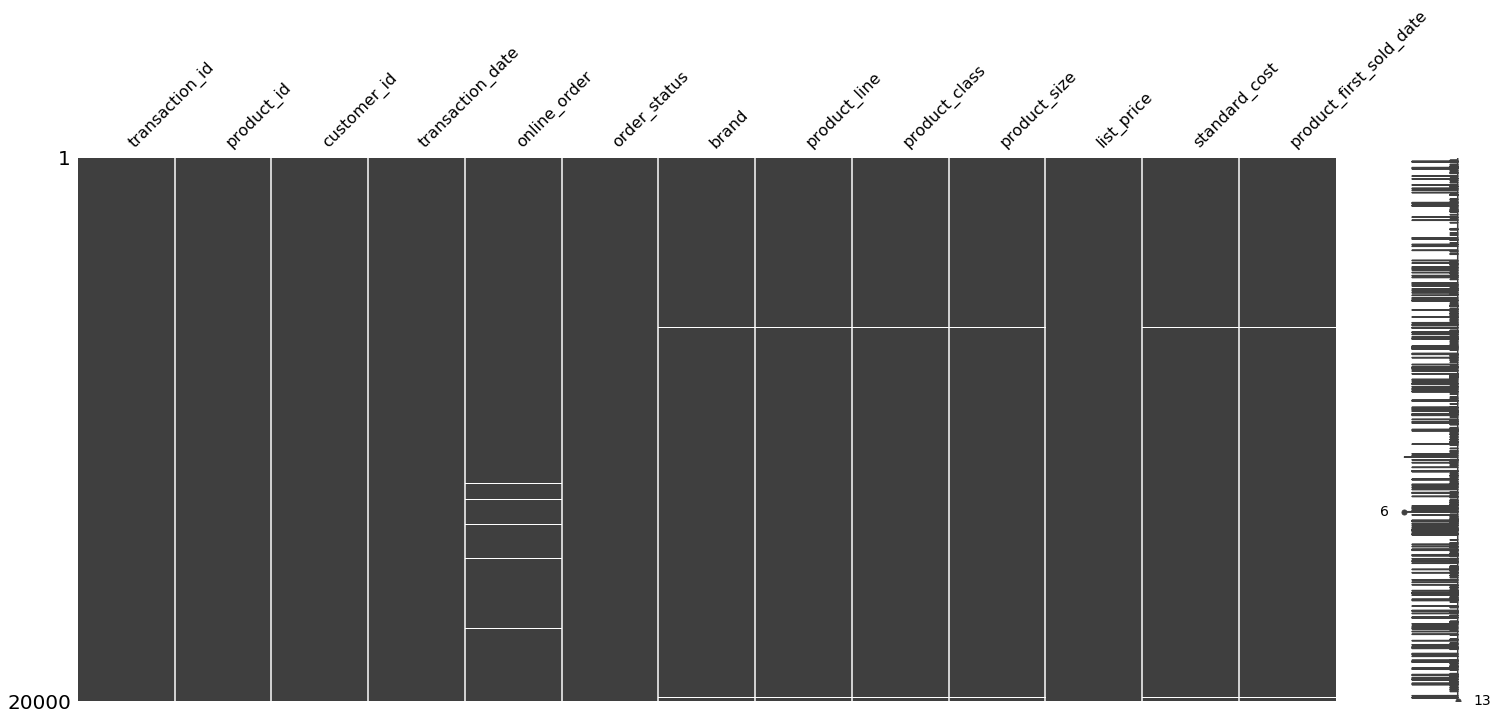

In [14]:
missingno.matrix(df_Transactions)

So, we see from the above plot that there's no relationship between missing values in the online_order column with product_line/product_class etc.

Since the missing values are very less <2% we can safely remove transaction with missing values

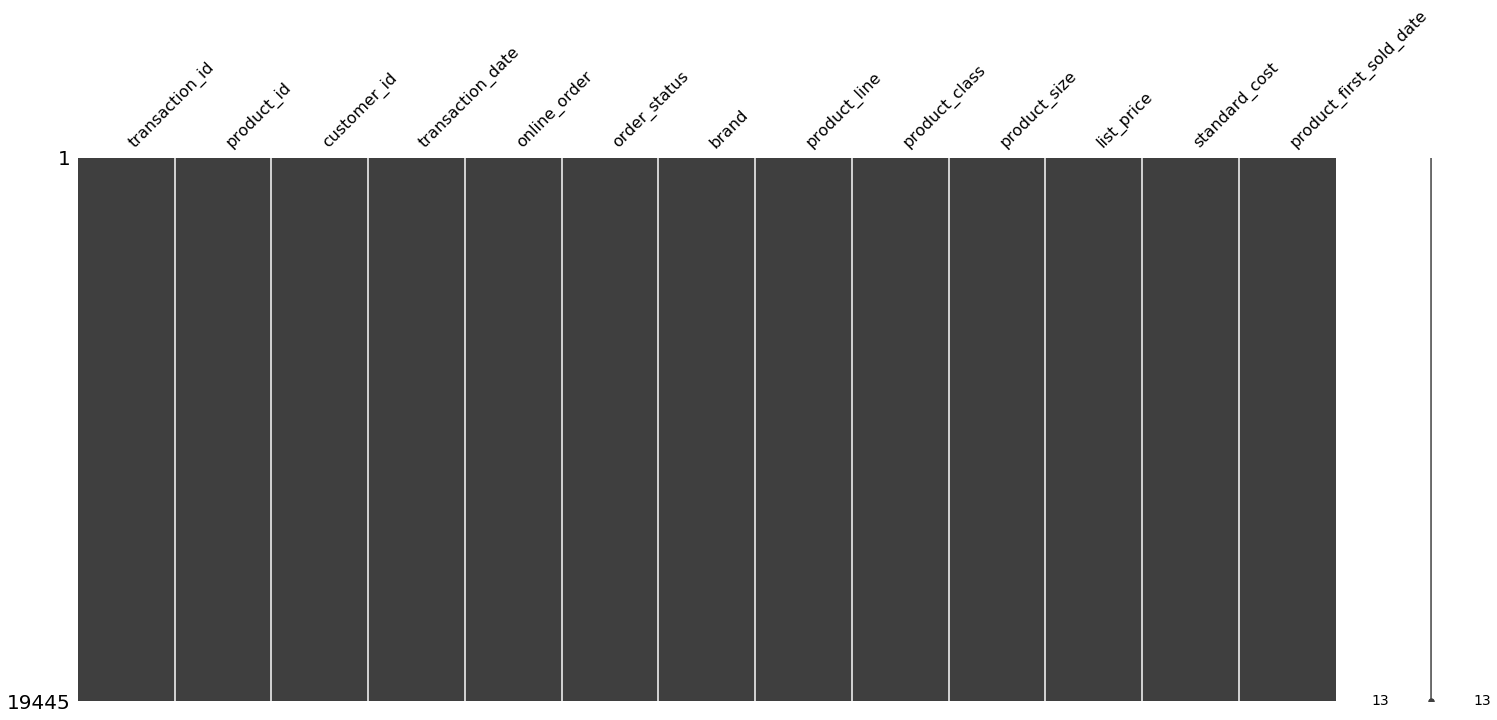

In [15]:
df_Transactions.dropna(axis = 0, inplace=True)
missingno.matrix(df_Transactions)

### NewCustomerList

#### DOB

In [4]:
df_NewCustomerList.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.56,0.7000,0.8750,0.743750,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.89,0.8900,1.1125,0.945625,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.01,1.0100,1.0100,1.010000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.87,1.0875,1.0875,1.087500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.52,0.5200,0.6500,0.650000,4,4,1.703125


In [5]:
df_NewCustomerList.shape

(1000, 23)

In [6]:
df_NewCustomerList.isnull().sum()/df_NewCustomerList.shape[0]*100

first_name                              0.0
last_name                               2.9
gender                                  0.0
past_3_years_bike_related_purchases     0.0
DOB                                     1.7
job_title                              10.6
job_industry_category                  16.5
wealth_segment                          0.0
deceased_indicator                      0.0
owns_car                                0.0
tenure                                  0.0
address                                 0.0
postcode                                0.0
state                                   0.0
country                                 0.0
property_valuation                      0.0
Unnamed: 16                             0.0
Unnamed: 17                             0.0
Unnamed: 18                             0.0
Unnamed: 19                             0.0
Unnamed: 20                             0.0
Rank                                    0.0
Value                           

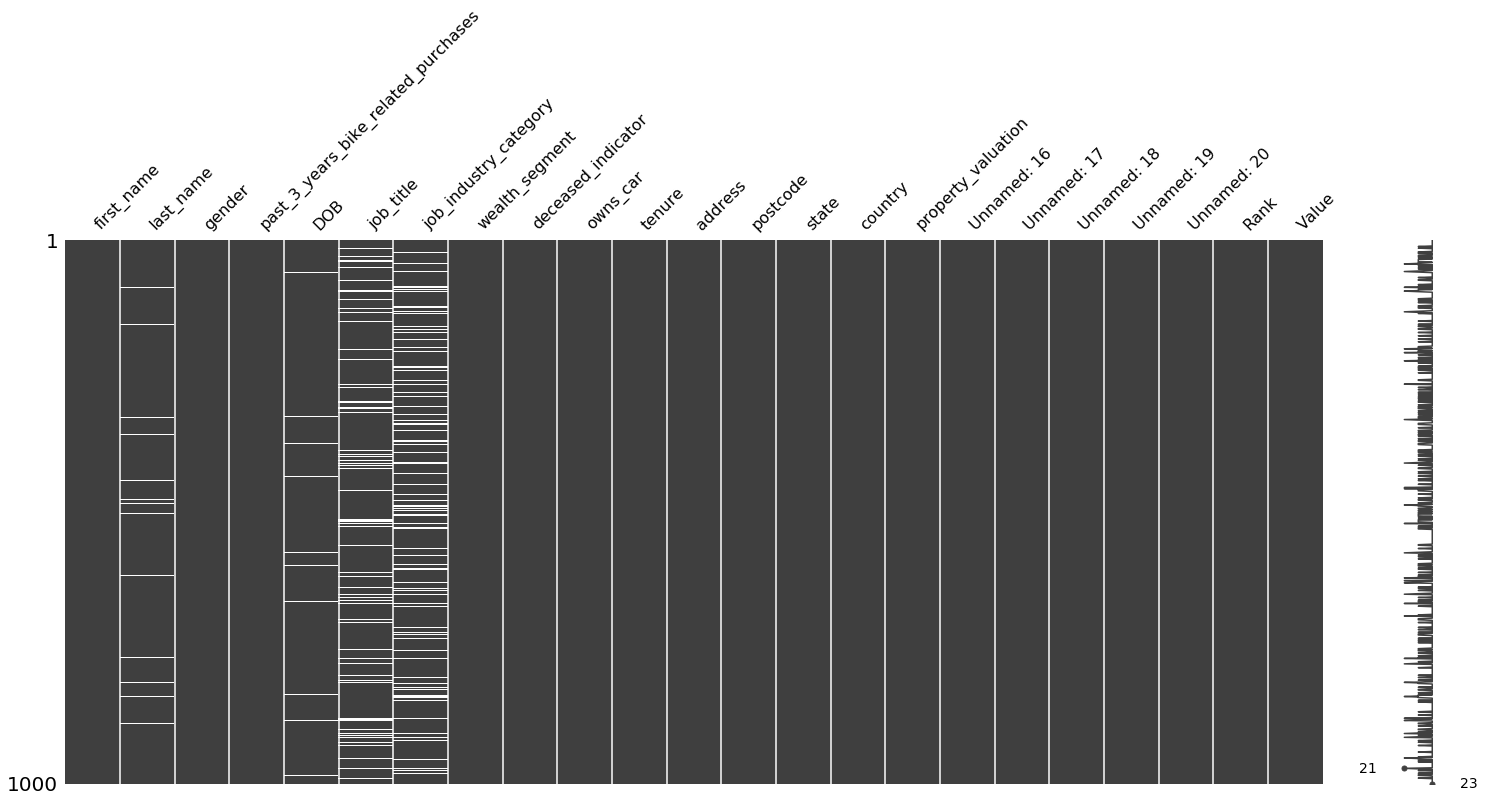

In [7]:
missingno.matrix(df_NewCustomerList)

In [8]:
df_NewCustomerList['Current Date'] =  datetime.fromisoformat("2021-07-12")
df_NewCustomerList['Current Date'].head()

0   2021-07-12
1   2021-07-12
2   2021-07-12
3   2021-07-12
4   2021-07-12
Name: Current Date, dtype: datetime64[ns]

In [9]:
df_NewCustomerList['Age'] = round((df_NewCustomerList['Current Date'] - df_NewCustomerList['DOB']).dt.days/365,1) 
#coverted timedelat to date
df_NewCustomerList['Age'].head()

0    64.0
1    51.3
2    46.9
3    42.5
4    55.8
Name: Age, dtype: float64

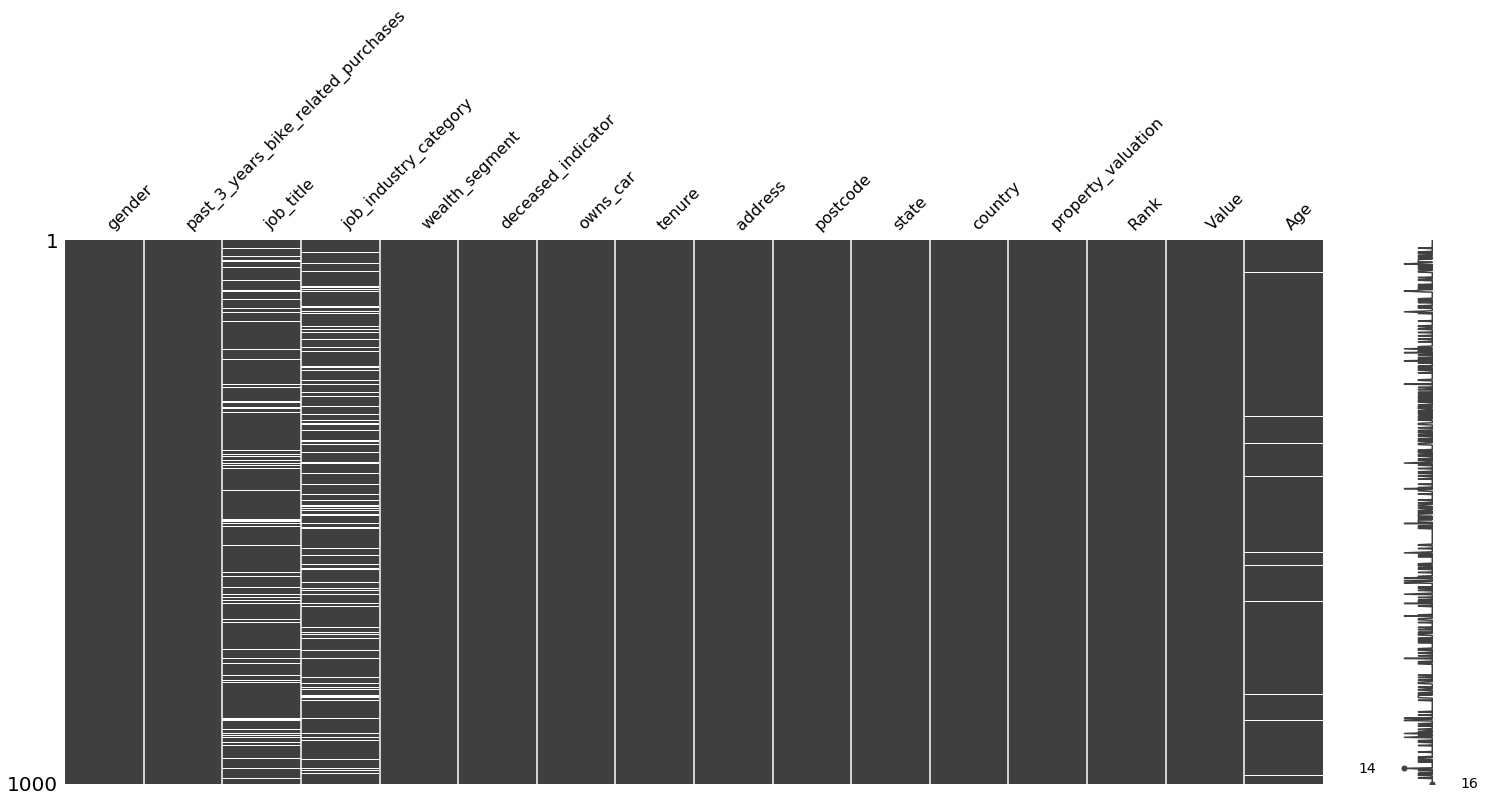

In [10]:
df_NewCustomerList.drop(["DOB","Unnamed: 16","Unnamed: 17","Unnamed: 18",
                         "Unnamed: 19","Unnamed: 20","first_name","last_name","Current Date"],axis = 1,inplace=True)
missingno.matrix(df_NewCustomerList)

In [181]:
df_NewCustomerList.isnull().mean()*100

gender                                  0.0
past_3_years_bike_related_purchases     0.0
job_title                              10.6
job_industry_category                  16.5
wealth_segment                          0.0
deceased_indicator                      0.0
owns_car                                0.0
tenure                                  0.0
address                                 0.0
postcode                                0.0
state                                   0.0
country                                 0.0
property_valuation                      0.0
Rank                                    0.0
Value                                   0.0
Age                                     1.7
dtype: float64

In [184]:
df_NewCustomerList = df_NewCustomerList[df_NewCustomerList[['Age']].notnull().all(1)]
df_NewCustomerList.isnull().sum()

gender                                   0
past_3_years_bike_related_purchases      0
job_title                              105
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
Age                                      0
dtype: int64

as of now I've removed all the irrelevant columns for our analysis. Rest of the missing values will be taken care of by the training data

#### CustomerDemographic

In [163]:
df_CustomerDemographic = pd.read_excel(xls, 'CustomerDemographic', skiprows=1)
df_CustomerDemographic.drop("default", axis =1, inplace = True)
df_CustomerDemographic.head(3)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0


In [164]:
df_CustomerDemographic.drop(["first_name","last_name"],axis =1, inplace= True)
df_CustomerDemographic.head(3)

,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0


In [165]:
df_CustomerDemographic['Current Date'] =  datetime.fromisoformat("2021-07-12")
df_CustomerDemographic['Age'] = round((df_CustomerDemographic['Current Date'] - df_CustomerDemographic['DOB']).dt.days/365,0)
df_CustomerDemographic.head(3)

,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Current Date,Age
0,1,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,2021-07-12,68.0
1,2,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,2021-07-12,41.0
2,3,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,2021-07-12,68.0


In [166]:
df_CustomerDemographic.drop(["DOB","Current Date"], axis =1, inplace = True)
df_CustomerDemographic.head(3)

,customer_id,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
0,1,F,93,Executive Secretary,Health,Mass Customer,N,Yes,11.0,68.0
1,2,Male,81,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,41.0
2,3,Male,61,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,68.0


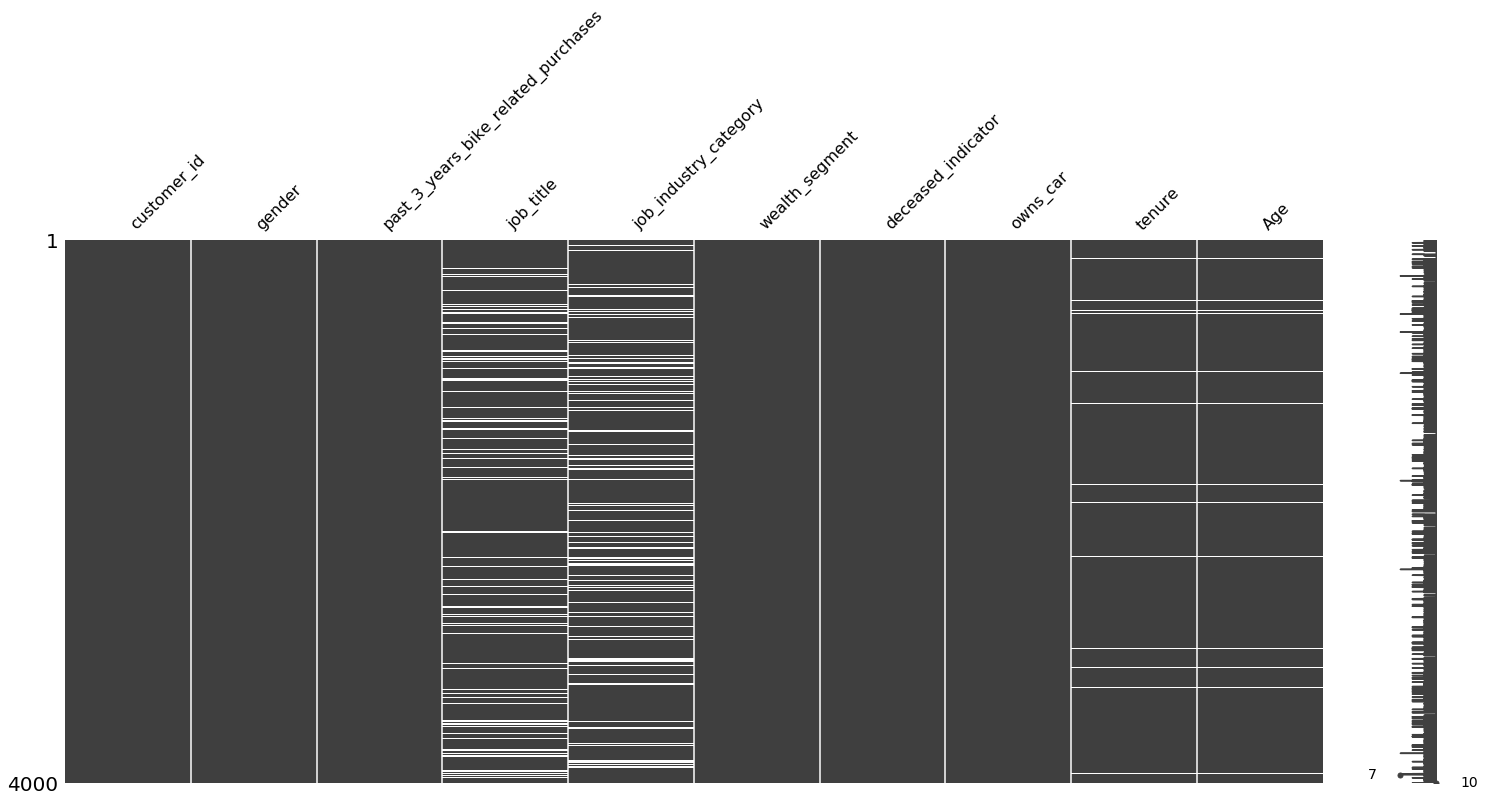

In [167]:
df_CustomerDemographic.fillna(np.nan, inplace = True) #converting all missing values to np.nan
missingno.matrix(df_CustomerDemographic)

In [168]:
df_CustomerDemographic.isna().sum()/df_CustomerDemographic.shape[0]*100

customer_id                             0.000
gender                                  0.000
past_3_years_bike_related_purchases     0.000
job_title                              12.650
job_industry_category                  16.400
wealth_segment                          0.000
deceased_indicator                      0.000
owns_car                                0.000
tenure                                  2.175
Age                                     2.175
dtype: float64

From above we can see that tenure and age, both have got <5% of NaN values. We can safely remove those entries with NaN

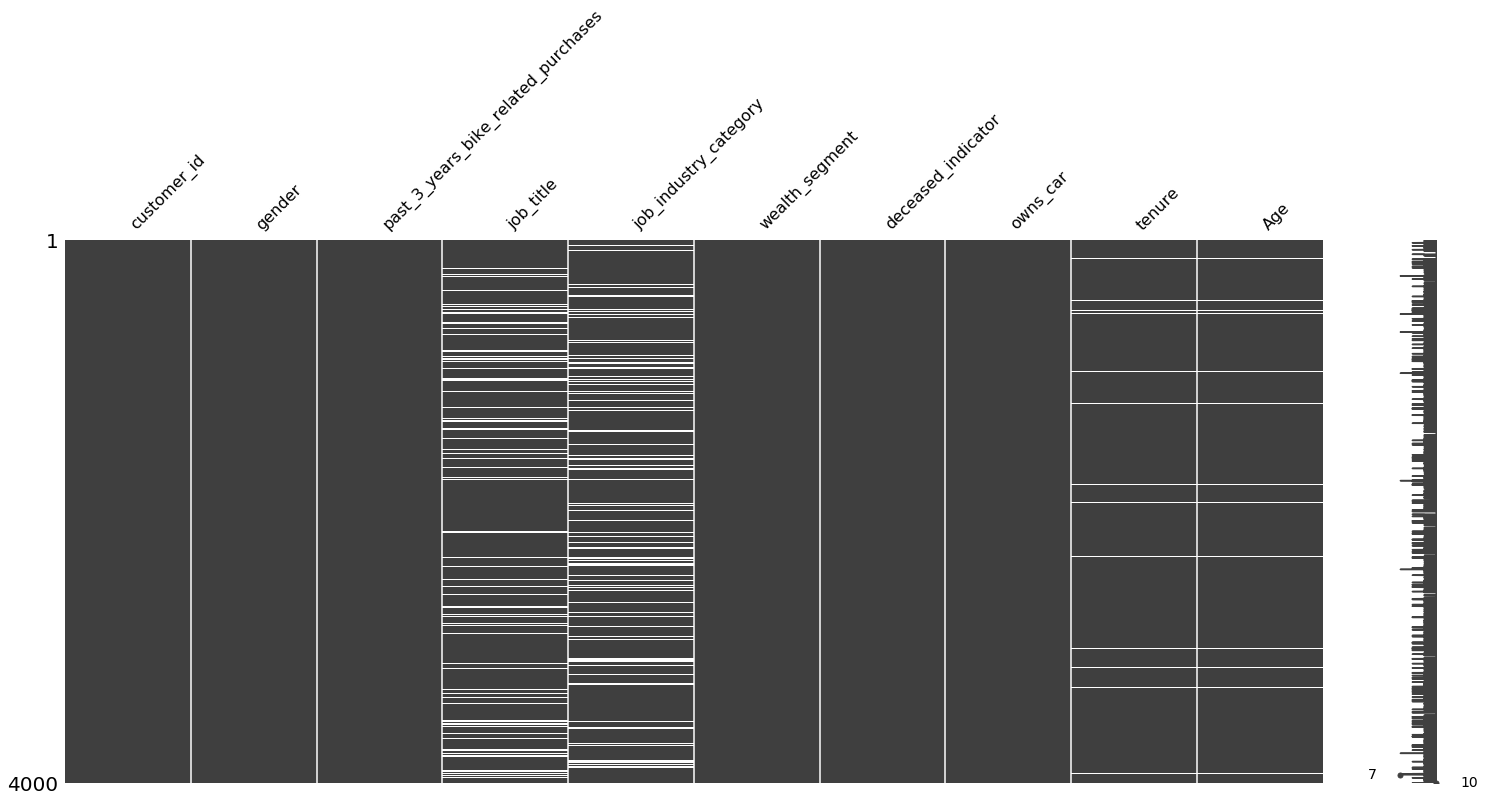

In [169]:
df_CustomerDemographic["tenure"].dropna(axis =0, inplace= True)
df_CustomerDemographic["Age"].dropna(axis =0, inplace= True)
missingno.matrix(df_CustomerDemographic)

In [170]:
df_CustomerDemographic.fillna(np.nan, inplace = True)

In [171]:
df_CustomerDemographic = df_CustomerDemographic[df_CustomerDemographic[['tenure', 'Age']].notnull().all(1)]
df_CustomerDemographic.isnull().sum()

customer_id                              0
gender                                   0
past_3_years_bike_related_purchases      0
job_title                              497
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
Age                                      0
dtype: int64

In [172]:
df_CustomerDemographic.shape

(3913, 10)

As we can see 12.65 % job_titles and 16.4 % job_industry_category are missing till now. Since it's >=5 % I'll not drop all the missing values. Instead I'll try to fill those missing values with a missing indicator, or else we might lose some valuable information

In [177]:
imputer_missing = CategoricalImputer(imputation_method= 'missing', fill_value= ' Missing')
df_CustomerDemographic = imputer_missing.fit_transform(df_CustomerDemographic)
df_CustomerDemographic.isnull().sum()

customer_id                            0
gender                                 0
past_3_years_bike_related_purchases    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
Age                                    0
dtype: int64

In [186]:
writer = pd.ExcelWriter('Cleaned Data.xlsx', engine='xlsxwriter')
df_Transactions.to_excel(excel_writer=writer,sheet_name= "Transactions", index=False)
df_CustomerDemographic.to_excel(excel_writer=writer,sheet_name= "CustomerDemographic", index=False)
df_NewCustomerList.to_excel(excel_writer=writer,sheet_name= "NewCustomerList", index=False)
writer.save()